# Week 8

## Notes:  redistricting project

### Redistricting

*Redistricting* is the process by which the congressional districts are redrawn every 10 years following the census.
* Congressional districts are made up of small *census blocks*
  * For the purposes of the project, we will assume each census block has population 1, so the population of a district is equal to its area.
* Congressional districts should
  * have equal populations (we will assume this is true for the project),
  * have centralized shapes (measured by perimeter-to-area ratio, or PAR),
  * accurately reflect the political lean of the map.
* The objective of redistricting is to redraw the boundaries between districts to better reflect changes to the population distribution and political lean of the state.

### Starting information

You will start the project with a map (array) of census blocks (entries) and their individual political lean (entry values of 0 or 1).  Your task is to create an initial district map (also an array) indicating which district each census block belongs to (entries are integers indicating district).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
example_vote_map = np.array([[0,0,0,0,1,1],[0,0,1,1,0,1],[0,0,1,1,0,0],[1,0,0,0,0,1],[1,1,0,0,1,1],[1,1,1,0,0,1]])
print(example_vote_map)

[[0 0 0 0 1 1]
 [0 0 1 1 0 1]
 [0 0 1 1 0 0]
 [1 0 0 0 0 1]
 [1 1 0 0 1 1]
 [1 1 1 0 0 1]]


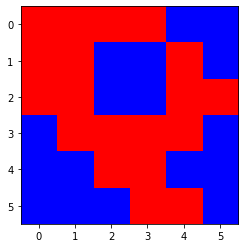

In [3]:
plt.imshow(example_vote_map,cmap=colors.ListedColormap(['red','blue']))
plt.show()

In [4]:
example_dist_map = np.array([[0,0,0,1,1,1],[0,0,2,2,1,1],[0,2,2,3,3,1],[2,2,4,4,3,3],[2,4,4,4,4,3],[5,5,5,5,5,5]])
print(example_dist_map)

[[0 0 0 1 1 1]
 [0 0 2 2 1 1]
 [0 2 2 3 3 1]
 [2 2 4 4 3 3]
 [2 4 4 4 4 3]
 [5 5 5 5 5 5]]


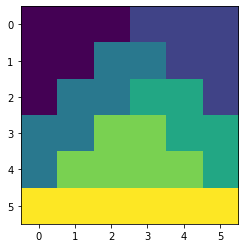

In [5]:
plt.imshow(example_dist_map)
plt.show()

### Scoring the map

Our map score will take into account a shape score based on the district map array and a political score based on the vote map array.
* Shape score:  $$ \frac{2k\sqrt{\pi}}{A\sum_{i=1}^k PAR_i} $$ if there are $ k $ districts with average area $ A $.
* Partisan score:  $$ 1 - \frac{|p - p_{dist}|}{p} $$ where $ p $ is the partisan lean of the vote map and $ p_{dist} $ is the partisan lean of the district map.

In [7]:
PARs = [2,2,16/7,12/5,2,14/6]
shape_score = (2*6*1.77)/(6*sum(PARs))
print(shape_score)

0.2719092904169715


In [8]:
p = np.sum(example_vote_map)/36
p_dist = 4/7
part_score = 1 - abs(p - p_dist)/p
print(part_score)

0.7899159663865547


If a district is exactly tied in the vote count (as is the case for district 1 in this toy example) it should be "duplicated" with one copy being counter for party A and one for party B.  This means that the total number of districts is artificially increase by 1.

### Managing the data

The most important aspect of this project is the way you are storing and managing the data needed for the various calculations.  All of this data can be obtained from the vote and district maps, but it may not be easy to do.

#### Dictionaries

In [1]:
dict1 = {'banana':'yellow','apples':'red','grapes':'purple',4:7}

In [2]:
dict1['banana']

'yellow'

In [3]:
dict2 = {}
for count in range(10):
    dict2[0.1*count] = (0.1*count)**2
dict2

{0.0: 0.0,
 0.1: 0.010000000000000002,
 0.2: 0.04000000000000001,
 0.30000000000000004: 0.09000000000000002,
 0.4: 0.16000000000000003,
 0.5: 0.25,
 0.6000000000000001: 0.3600000000000001,
 0.7000000000000001: 0.4900000000000001,
 0.8: 0.6400000000000001,
 0.9: 0.81}

In [4]:
dict1.keys()

dict_keys(['banana', 'apples', 'grapes'])

In [5]:
dict1.values()

dict_values(['yellow', 'red', 'purple'])

In [6]:
for key in dict1.keys():
    print(dict1[key])

yellow
red
purple


#### Suggestion

Write a function that will take the district and the vote maps as inputs, and outputs a dictionary that stores all the necessary information for computing the map score.
* Which blocks are in each district, and whether or not they are on the border
* What the perimeter is
* What the area is
* What the PAR is
* What the political lean is
